In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [47]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [48]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [49]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
y = pd.DataFrame(target, columns=["price"])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [55]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


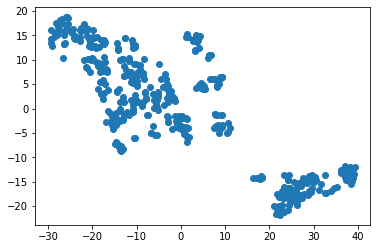

In [56]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Lesson 8.2


In [57]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)

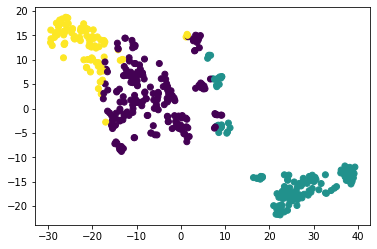

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [59]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


In [60]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Кластер 0: 24.958115183246072
Кластер 1: 16.165354330708666
Кластер 2: 27.788372093023252


Lesson 8.3


In [61]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


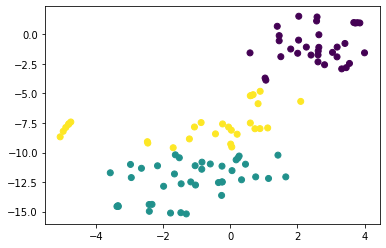

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_test = kmeans.fit_predict(X_test_tsne)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [65]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 10.707682121212121
Кластер 1: 0.12175849999999996
Кластер 2: 0.41836965517241376


In [66]:
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

Кластер 0: 16.421212121212122
Кластер 1: 26.6
Кластер 2: 20.203448275862073
